In [ ]:
#install opencv
#install mahotas

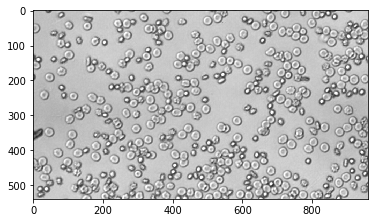

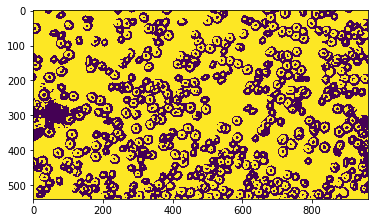

Found 448 RBC.


In [2]:
#Reading original and count total no of cells
#Method 1 - gaussian
from pylab import imshow, show
import numpy as np
import mahotas as mh

#t_mh = mh.imread('A_20X_2.jpg') #0.7
t_mh = mh.imread('A_40X_2.jpg') #1.5
imshow(t_mh)
show()

t_mh = t_mh[:,:,0] #RGB to greyscale
#t_mh = mh.gaussian_filter(t_mh, 0.7) #blur edges and reduce contrast
t_mh = mh.gaussian_filter(t_mh, 1.5) #blur edges and reduce contrast
t_mh = (t_mh > t_mh.mean())
imshow(t_mh)
show()

labeled, t_totalcells = mh.label(t_mh)
print('Found {} RBC.'.format(t_totalcells))

In [3]:
#Reading original and count total no of cells
#Method 2 - circles
import cv2
import numpy as np

#t_cv2 = cv2.imread('A_20X_5.jpg',0)
t_cv2 = cv2.imread('A_40X_2.jpg',0)
t_cv2 = cv2.medianBlur(t_cv2,5)
img = cv2.cvtColor(t_cv2,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(t_cv2,cv2.HOUGH_GRADIENT,1,15,
                            param1=200,param2=10,minRadius=0,maxRadius=15) #40X

#circles = cv2.HoughCircles(t_cv2,cv2.HOUGH_GRADIENT,1,12,
#                            param1=100,param2=3,minRadius=0,maxRadius=5) #20x

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('Detected circles',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2_totalcells = circles.shape[1] #2nd number shows the number of circles

print(cv2_totalcells) 

483


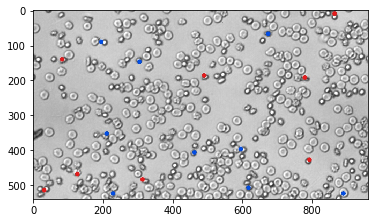

In [4]:
#Reading the dotted image
#Red = echinocytes
#Blue = foreign particles
#https://likegeeks.com/python-image-processing/#Color-Detection

import cv2
import numpy as np
import mahotas as mh
import pylab as plb
import matplotlib.pyplot as plt

#read and show for mh
#img_mh = mh.imread('X6.jpg')
#plb.imshow(img_mh)
#plb.show() 

#read and show for cv2
img_cv = cv2.imread('X1.jpg')
c_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.imshow(c_img)
plt.show() #show img in python

In [5]:
#Convert img to hsv for identification of colours
hsv_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV) #Hue saturation value (HSV)
cv2.imshow("HSV.jpg", hsv_img) #title, img
cv2.waitKey(0) #open img in window

#Identify red dots = echinocytes
#Identification of colours - masking
lower = np.array([0,100,100]) #red, green, blue
upper = np.array([20,255,255])
masking_red = cv2.inRange(hsv_img, lower, upper)
cv2.imshow("Identify Echinocytes",masking_red) #white = red
cv2.waitKey(0) #open img in new window
cv2.destroyAllWindows()

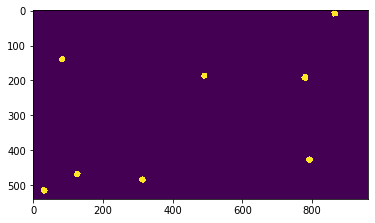

Found 8 echinocytes


In [6]:
#Counting red = echinocytes
import mahotas as mh
from pylab import imshow, show
echin = mh.gaussian_filter(masking_red, 1) #blur edges and reduce contrast
echin = (echin> echin.mean())
imshow(echin)
show()

labeled, label_echin = mh.label(echin)
n_echin = format(label_echin)
print('Found', n_echin, 'echinocytes')

In [94]:
#Identify blue dots = foreign particles
#Identification of colours - masking
lower = np.array([101,50,38]) #red, green, blue
upper = np.array([110,255,255])
masking_blue = cv2.inRange(hsv_img, lower, upper)
cv2.imshow("Identify Foreign Particles",masking_blue) #white = blue
cv2.waitKey(0) #open img in new window
cv2.destroyAllWindows()

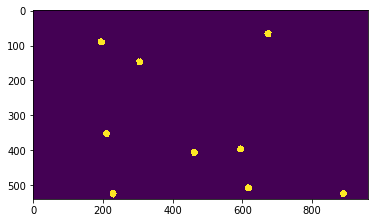

Found 9 foreign particles


In [99]:
#Counting blue = foreign particles
import mahotas as mh
from pylab import imshow, show
fp = mh.gaussian_filter(masking_blue, 1) #blur edges and reduce contrast
fp = (fp> fp.mean())
imshow(fp)
show()

labeled, label_fp = mh.label(fp)
n_fp = format(label_fp)
print('Found', n_fp, 'foreign particles')

In [104]:
RBC = int(cv2_totalcells) - int(n_echin) - int(n_fp)
print('Total number of RBC (excluding echinocytes and foreign particles): ', RBC)

Total number of RBC (excluding echinocytes and foreign particles):  419


In [ ]:
#----------------------------References-----------------------------------------

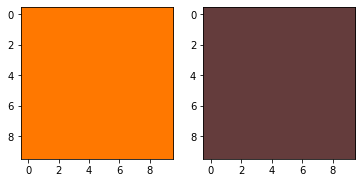

In [7]:
#display colour chosen
#https://realpython.com/python-opencv-color-spaces/
from matplotlib.colors import hsv_to_rgb

green = (0,100,100)
red = (20,255,255)

lo_square = np.full((10, 10, 3), green, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), red, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square)) #red
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square)) #green
plt.show()

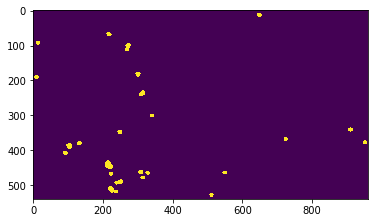

Found 24 RBC.


In [8]:
#others
#https://stackoverflow.com/questions/46036172/irregular-shape-detection-and-measurement-in-python-opencv
import numpy as np
import cv2

img = cv2.imread('A_20X_1.jpg')
blur = cv2.GaussianBlur(img, (7, 7), 2)
h, w = img.shape[:2]

# Morphological gradient
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
cv2.imshow('Morphological gradient', gradient)
cv2.waitKey()

# Binarize gradient
lowerb = np.array([0, 0, 0])
upperb = np.array([40, 40, 40])
binary = cv2.inRange(gradient, lowerb, upperb)
cv2.imshow('Binarized gradient', binary)
cv2.waitKey()

# Flood fill from the edges to remove edge crystals
for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)

cv2.imshow('Filled binary gradient', binary)
cv2.waitKey()

# Cleaning up mask
foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Cleanup up crystal foreground mask', foreground)
cv2.waitKey()

from pylab import imshow, show
import numpy as np
import mahotas as mh

foreground1 = mh.gaussian_filter(foreground, 1) #blur edges and reduce contrast
foreground1 = (foreground1 > foreground1.mean())
imshow(foreground1)
show()

labeled, t_totalcells = mh.label(foreground1)
print('Found {} RBC.'.format(t_totalcells))

In [95]:
#recount circles X
import cv2
import numpy as np


foreground = cv2.medianBlur(foreground,5)
img = cv2.cvtColor(foreground,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(foreground,cv2.HOUGH_GRADIENT,1,15,
                            param1=200,param2=10,minRadius=0,maxRadius=15) #40X

#circles = cv2.HoughCircles(t_cv2,cv2.HOUGH_GRADIENT,1,12,
#                            param1=100,param2=3,minRadius=0,maxRadius=5) #20x

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('Detected circles',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2_totalcells = circles.shape[1] #2nd number shows the number of circles

print(cv2_totalcells) 

3
